In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
tips = sns.load_dataset('tips')


In [3]:
# View the first few rows
print(tips.head())

# Dataset information
print(tips.info())

# Statistical summary
print(tips.describe())

# Check for missing values
print(tips.isnull().sum())


# GOAL
# total_bill : 30, tip :3 , sex :Femalr, day:Monday, size:3------------> TIME: DINNER.LUNCH, BREAKFAST (approximate)
# Tip : 5, sex: male, time, dinner, size=5, ------->what should be the approx total_bill


   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
None
       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672


In [ ]:
tips.columns ##represents the size of the dining party, i.e., the number of people at the table

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

The dataset consists of the following features:

- **order_id**: unique identifier of each order
- **day**: day of the week on which the customer visited the restaurant (Thur/Fri/Sat/Sun)
- **time**: time of the day at which the customer visited the restaurant (Lunch or Dinner)
- **size**: number of people present at the table
- **smoker**: whether the table included smokers (No: The table did not include smokers, Yes: The table included smokers)
- **sex**: gender of the payer of the bill (Male or Female)
- **total_bill**: the bill amount in dollars
- **tip**: the tip amount in dollarsdollars

In [ ]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


**Plotting Histogram**

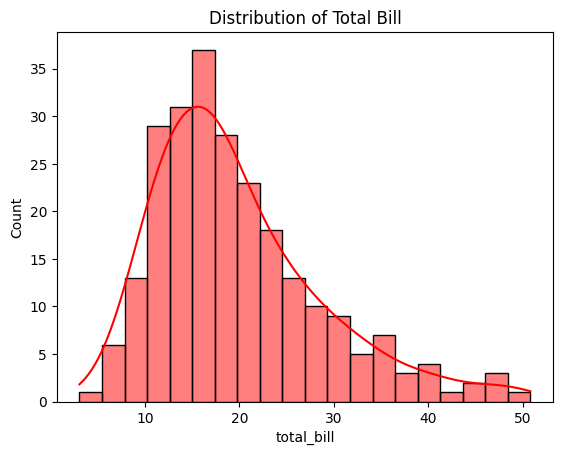

In [4]:
# Histogram and KDE for `total_bill`
sns.histplot(tips['total_bill'], kde=True, bins=20, color='red')
plt.title('Distribution of Total Bill')
plt.show()

<Axes: xlabel='tip', ylabel='Count'>

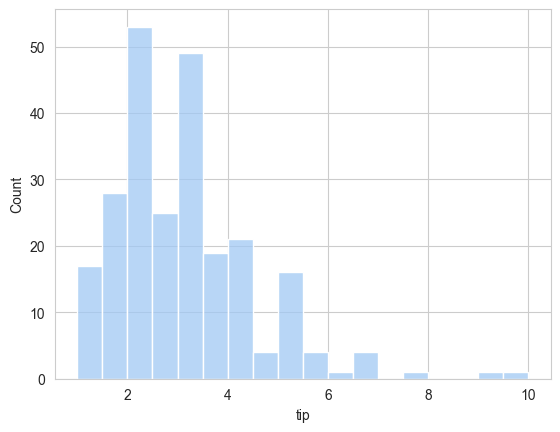

In [ ]:
sns.histplot(data=tips, x='tip')

<Axes: xlabel='tip'>

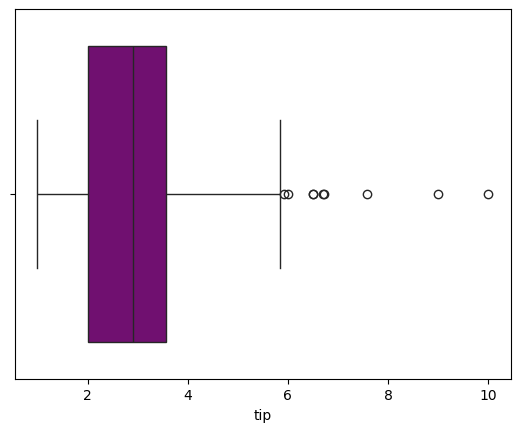

In [5]:
sns.boxplot(data=tips, x="tip",color='purple')

Explanation boxplot:

The boxplot shows the spread of tip amounts, with most tips concentrated between $2 and $4.
A clear median indicates the typical tipping behavior of customers.
Several high-value outliers appear on the right, showing that some customers leave exceptionally large tips.
The presence of outliers increases the overall average tip, making the mean higher than the median.
This suggests that tip amounts are right-skewed, impacting analyses such as pricing, staff performance evaluation, or forecasting.



<Axes: xlabel='size', ylabel='Count'>

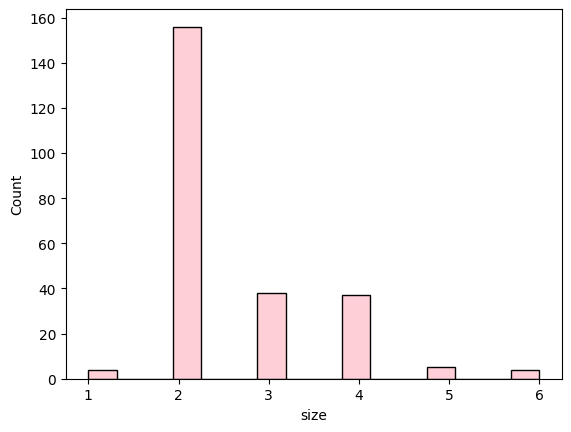

In [6]:
sns.histplot(data=tips, x='size',color='pink')

!https://seaborn.pydata.org/generated/seaborn.histplot.html

!https://seaborn.pydata.org/tutorial/color_palettes.html#qualitative-color-pale

<Axes: xlabel='size'>

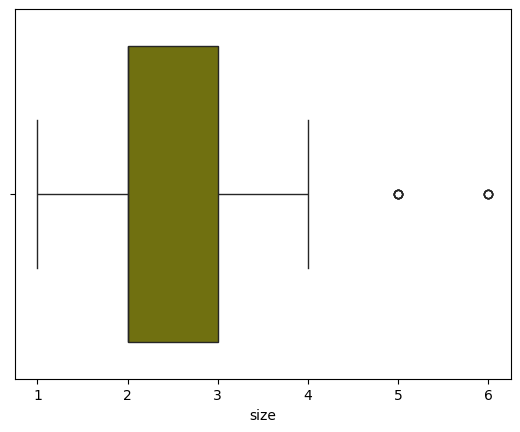

In [7]:
sns.boxplot(data=tips, x="size",color='olive')

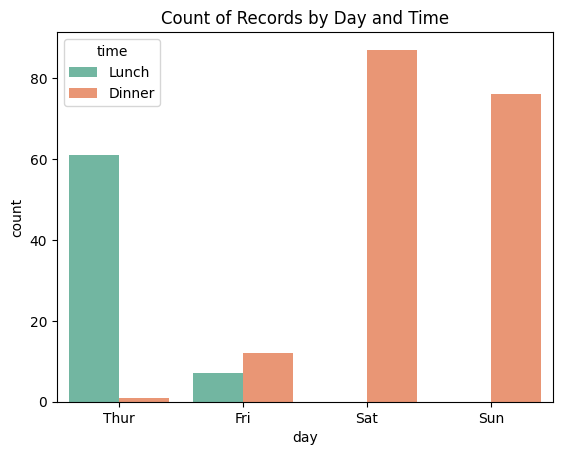

In [12]:
# Count of categorical variable `day`
sns.countplot(data=tips, x='day', hue='time', palette='Set2')
plt.title('Count of Records by Day and Time')
plt.show()


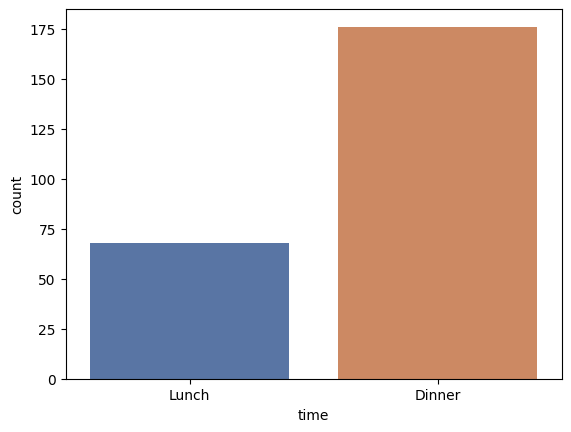

In [15]:
sns.countplot(data=tips, x='time', hue='time', palette='deep', legend=False)
plt.ylabel('count')
plt.show()



<Axes: xlabel='sex', ylabel='count'>

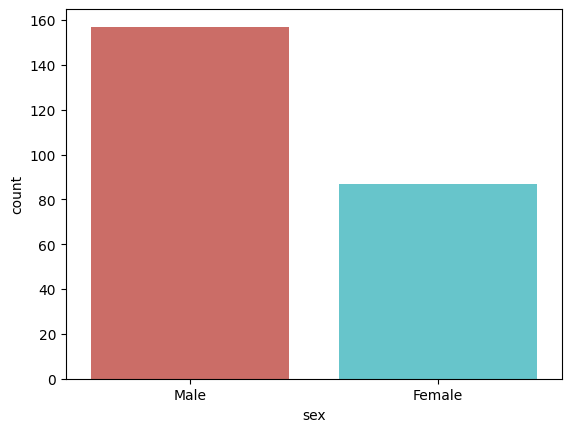

In [16]:
sns.countplot(data=tips, x='sex',hue='sex', palette='hls')

<Axes: xlabel='smoker', ylabel='count'>

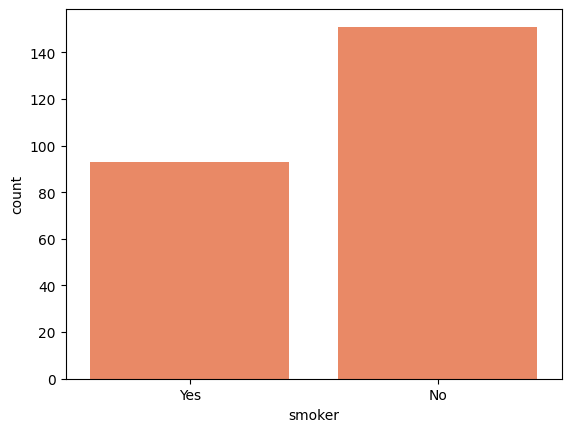

In [17]:
sns.countplot(data=tips, x='smoker', color='coral')

<Axes: xlabel='day', ylabel='count'>

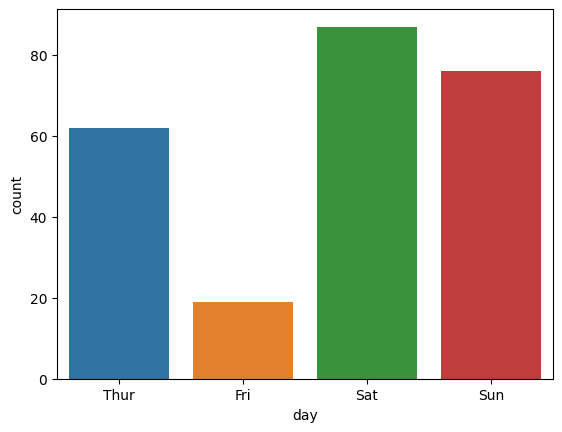

In [18]:
sns.countplot(data=tips, x='day', hue='day')

<Axes: xlabel='day', ylabel='count'>

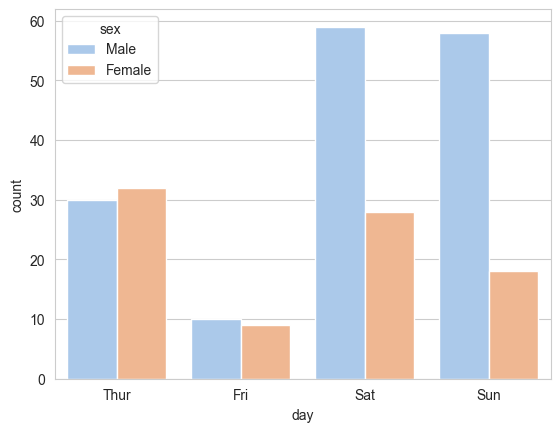

In [ ]:
sns.countplot(data=tips, x='day', hue='sex')

<Axes: xlabel='day', ylabel='count'>

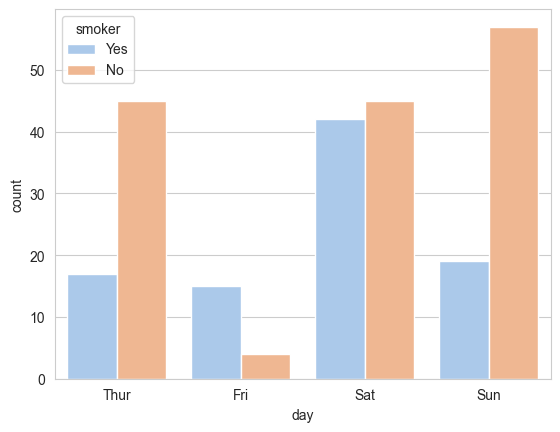

In [ ]:
sns.countplot(data=tips, x='day', hue='smoker')

**Plotting ScatterPlots**

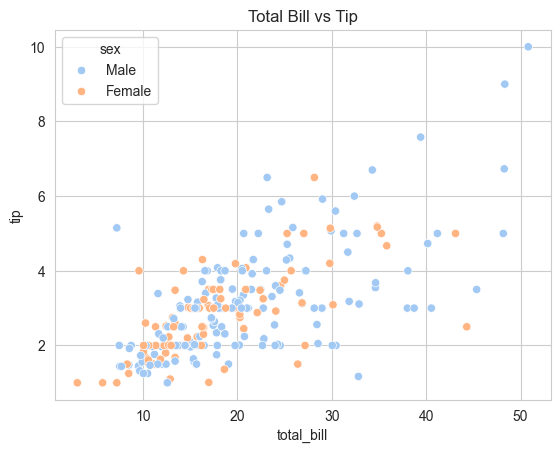

In [ ]:
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='sex')
plt.title('Total Bill vs Tip')
plt.show()

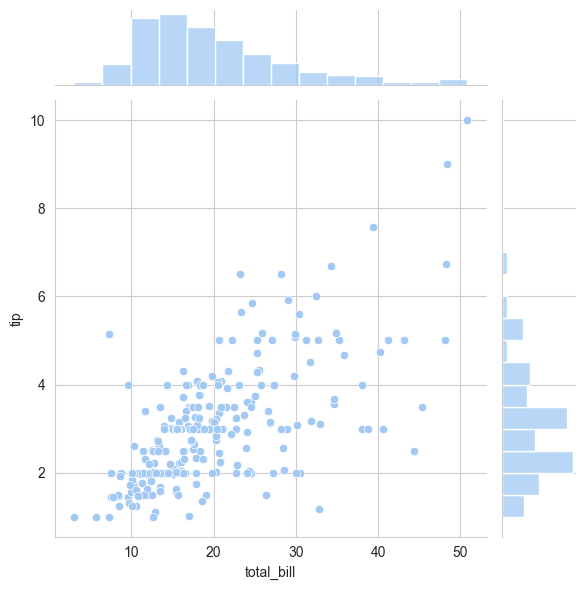

In [ ]:
sns.jointplot(data=tips, x='total_bill', y='tip')

**Explanation:** The jointplot shows a positive relationship between total bill and tip amount—higher bills generally lead to higher tips.
Most points cluster in the lower range (bills between $10–$25 and tips between $2–$4), indicating typical customer behavior.
The scatter pattern suggests a moderately strong linear association, though with some variability in tipping habits.
The marginal histograms show that smaller bills and smaller tips occur more frequently.
This relationship helps restaurants forecast expected tips, analyze staff performance, and understand customer spending patterns.

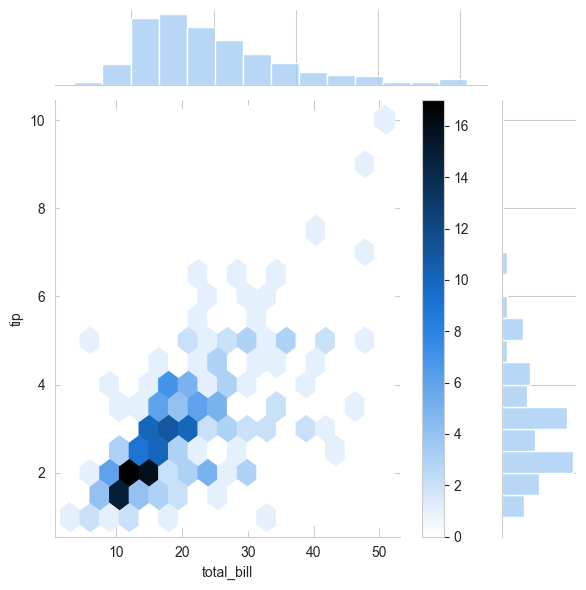

In [ ]:
sns.jointplot(data=tips, x='total_bill', y='tip', kind='hex')
plt.colorbar(); # adds a separate axis indicating the color scale in this plot

**Explanation:**

1. The hexbin plot shows the relationship between **total bill** and **tip**, where darker hexagons indicate a higher concentration of data points.
2. Most observations cluster around **total bills between 10–20 dollars** and **tips between 2–4 dollars**, showing this is the most common range.
3. As the total bill increases, tips also tend to increase, indicating a **positive correlation**.
4. The lighter and sparse hexagons at higher bill amounts show **fewer customers** spending above 30–50 dollars.
5. The colorbar quantifies density, helping identify regions with **high customer frequency**, which is valuable for understanding tipping patterns.


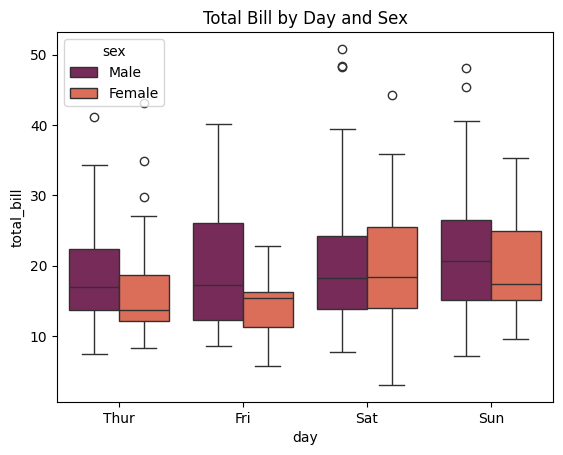

In [19]:
sns.boxplot(data=tips, x='day', y='total_bill', hue='sex', palette='rocket')
plt.title('Total Bill by Day and Sex')
plt.show()

**Explanation:** The boxplot shows how total bill amounts vary by day and gender.  
Females tend to have slightly lower median bills than males across most days.  
Saturday and Sunday show wider spreads and more outliers, indicating higher variability in spending.  
The rocket palette helps visually distinguish gender-based patterns in billing behavior.  
This insight can guide targeted promotions or staffing decisions based on day and customer profile.


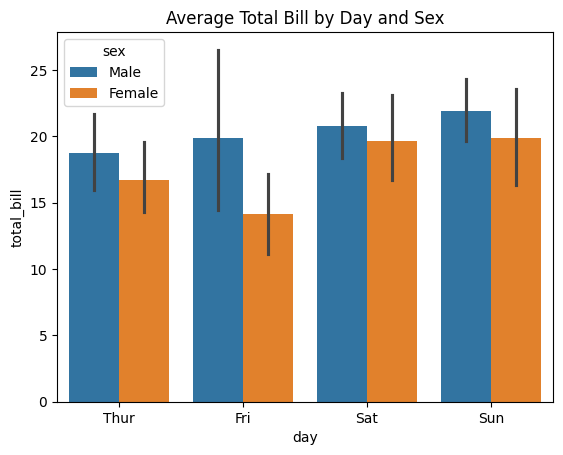

In [ ]:
sns.barplot(data=tips, x='day', y='total_bill', hue='sex', estimator=np.mean)
plt.title('Average Total Bill by Day and Sex')
plt.show()

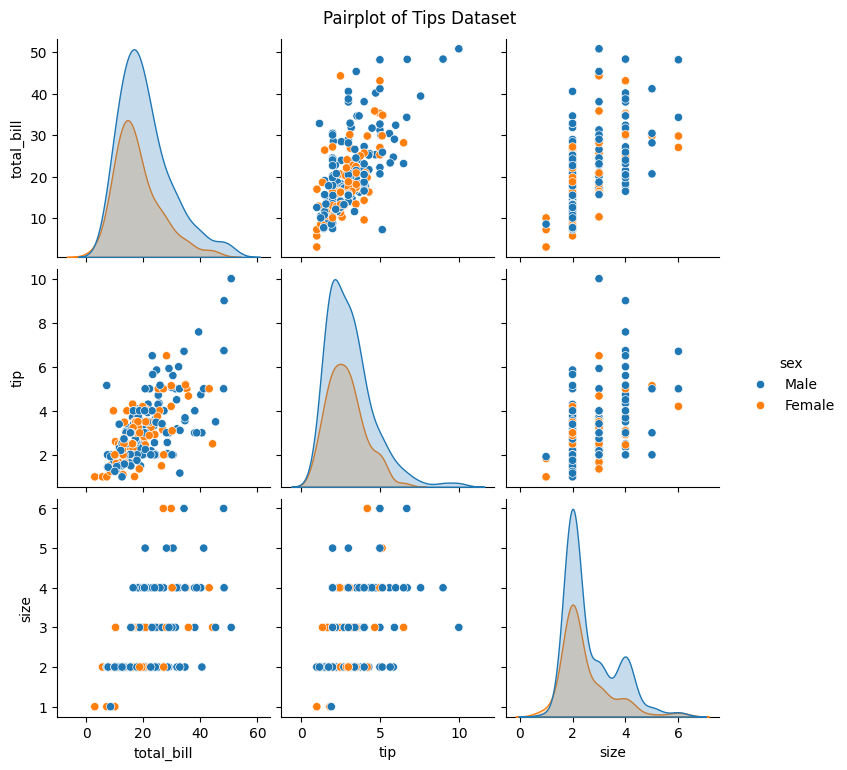

In [ ]:
sns.pairplot(tips, hue='sex', diag_kind='kde')
plt.suptitle('Pairplot of Tips Dataset', y=1.02)
plt.show()
#The parameter y=1.02 in plt.suptitle() specifies the vertical position of the title relative to the plot.

**Explanation**:
1. Most total bills range from ₹10 to ₹50, with tips between ₹2 and ₹10.  
2. A ₹20 bill often gets a ₹3–₹4 tip; a ₹40 bill may get ₹6–₹8.  
3. Group sizes are mostly 2–4 people, and larger groups tend to spend more.  
4. Male customers show slightly higher spending and tipping in larger groups.  
5. The curved plots show that ₹15–₹25 bills and ₹3–₹5 tips are most common.  
6. This helps restaurants predict spending patterns and tailor service by group size and gender.

Outliers and density shading help assess data spread and clustering.
This plot supports exploratory analysis and informs targeted business strategies.


In [ ]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

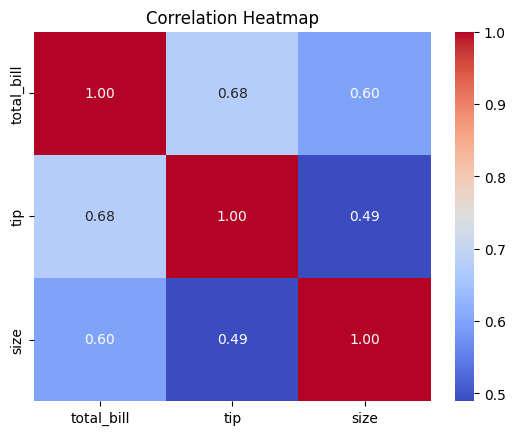

In [ ]:
corr_matrix = tips[['total_bill','tip','size']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


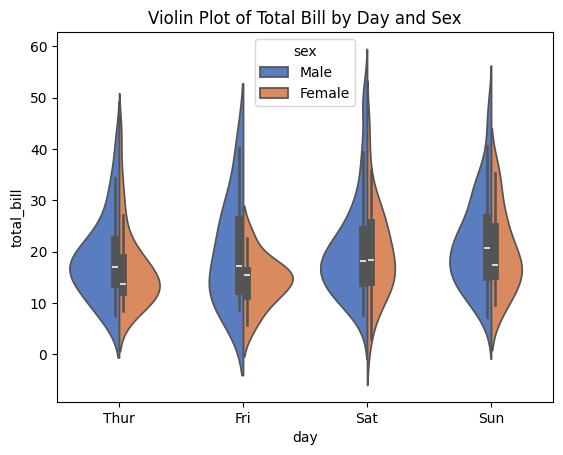

In [ ]:
sns.violinplot(data=tips, x='day', y='total_bill', hue='sex', split=True, palette='muted')
plt.title('Violin Plot of Total Bill by Day and Sex')
plt.show()


**Explanation:**
 The plot shows how much customers spend (`total_bill`) on different days, split by gender.  
 The **width** of each violin shows how common a bill amount is—wider = more frequent.  
 **Saturday and Sunday** have the widest violins, meaning more spending and more customers.  
 **Males** tend to have slightly higher bills on weekends, with more variation.  
 **Females** show tighter distributions, especially on Thursday and Friday.  
 The **box inside** each violin shows the middle 50% of bills and the median.  
 This helps restaurants see when and how spending differs by gender and day.


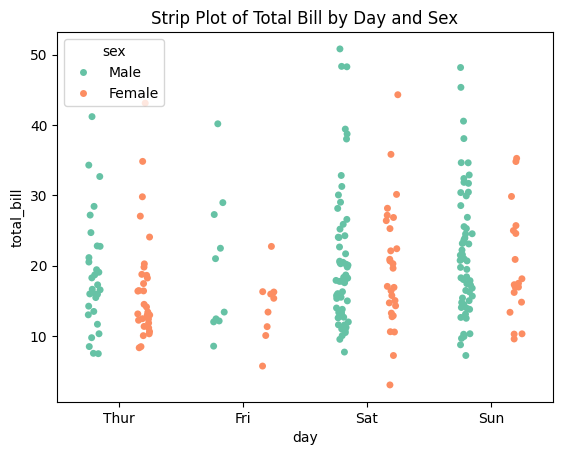

In [ ]:
sns.stripplot(data=tips, x='day', y='total_bill', hue='sex', jitter=True, dodge=True, palette='Set2')
plt.title('Strip Plot of Total Bill by Day and Sex')
plt.show()


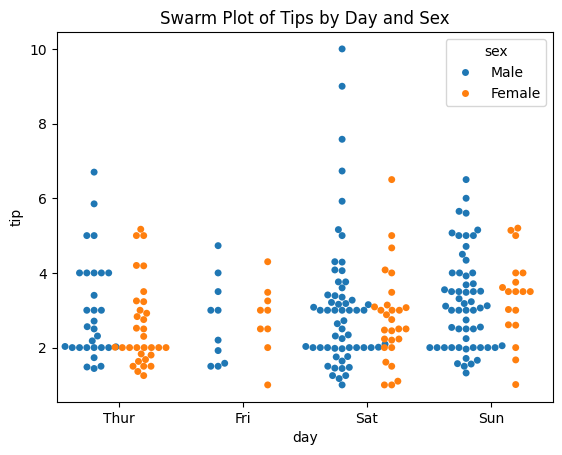

In [ ]:
sns.swarmplot(data=tips, x='day', y='tip', hue='sex', dodge=True)
plt.title('Swarm Plot of Tips by Day and Sex')
plt.show()


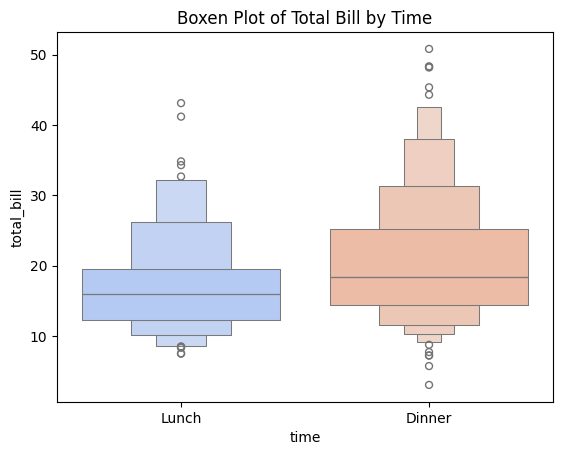

In [22]:
sns.boxenplot(data=tips, x='time', y='total_bill', hue='time', palette='coolwarm', legend=False)
plt.title('Boxen Plot of Total Bill by Time')
plt.show()



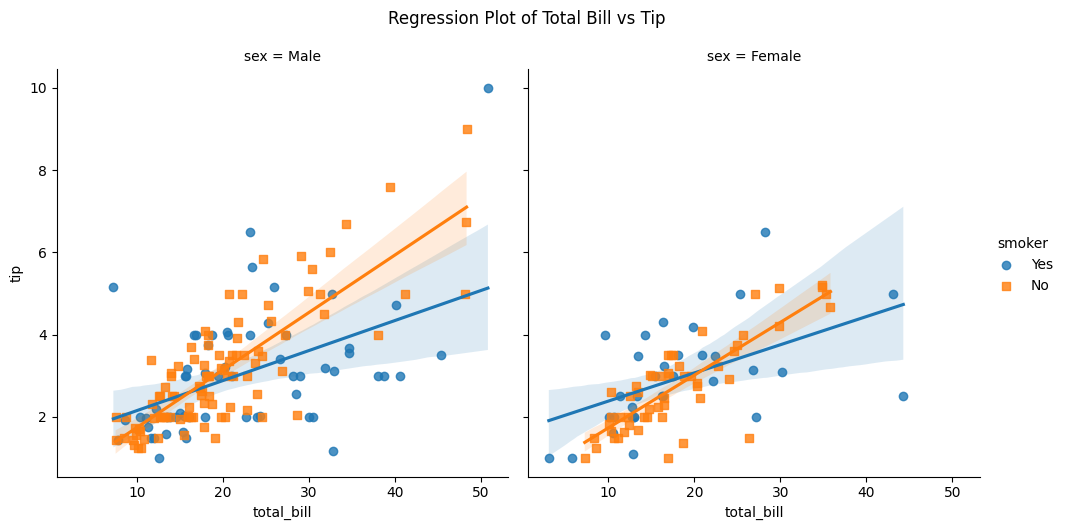

In [ ]:
sns.lmplot(data=tips, x='total_bill', y='tip', hue='smoker', col='sex', markers=['o', 's'])
plt.suptitle('Regression Plot of Total Bill vs Tip', y=1.05)
plt.show()


**Customizing the plot**

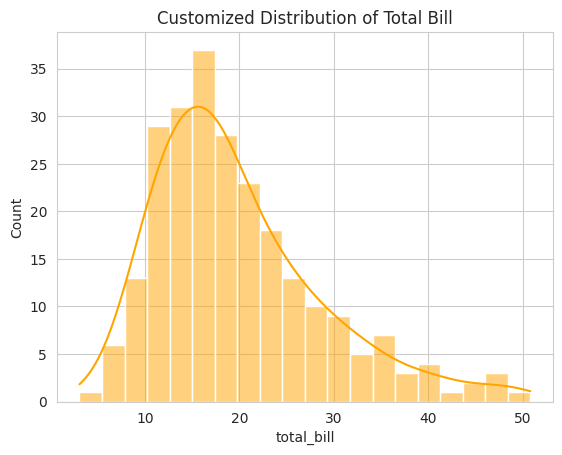

In [29]:
sns.set_style('whitegrid')  # Set grid style
sns.set_palette('cool')  # Set color palette

# Example customized plot
sns.histplot(tips['total_bill'], kde=True, bins=20, color='orange')
plt.title('Customized Distribution of Total Bill')
plt.show()


**Insights**

- *The bill amount ranges from around 3 dollars to 50 dollars while the average bill amount is around 20 dollars. Half of the bill amounts are less than 18 dollars.*
- *The tip amount ranges from around 1 dollar to 10 dollars. The mean and median of the tip amounts are very close to each other (~3 dollars).*
- *The group size varies from 1 person to 6 people.*
- *50%  of the people pay less than 20 dollars for overall bill and 50% of the people pay less than 3 dollars as tip.*
- *There is a linear relationship between `total_bill` and `tip` i.e higher the billing amount, higher is the tip amount and vice versa.*
- *The relationship between `total_bill` and `tip` is linear with respect to both the genders, day and time*
- *Non smokers show a more prominent linear relationship between total_bill and tip as compared to smokers*
- *With respect to size of the group, this relationship between `total_bill` and `tip` gets constant as the size of the group increases.*
- *The number of orders is higher on weekends as compared to the weekdays. The order count is higher during the dinner time as compared to lunch*
- *The median billing amount on Saturdays and Sundays is higher than the other two days.*
- *The median tip amount is almost equal during Friday, Saturday and Sunday and the median during these three days is higher as compared to Thursday*
- *50% of the customers spend more than 19 dollars on the overall bill during the dinner time as compared to 16 dollars during lunch*
- *The median tip amount given during dinner is almost 1 dollar higher than that given during lunch time.*
- *The number of male and female bill payers is around 160 and 80 respectively i.e the number of male bill payers is almost double as compared to the number of female bill payers*
- *On Saturdays and Sundays, the number of male bill payers is significantly higher than the number of female bill payers.*
- *The median value for `tip` is almost equal for both the genders.*
- *Males have a lot of outliers i.e far away values, giving higher tips.*
- *The tables which included non-smokers is around 60 more than those which included smokers*
- *The number of non-smokers is significantly higher than the number of smokers on Thursdays and Sundays*
- *Among all the four days, only on Fridays,the number of smokers is higher than the number of non-smokers*
- *There is no relation between smoking status and tips, the median is almost the same in both the classes*